In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from common import NWSL, Fonts, Images, Colors, add_signature

In [2]:
year_start = 2018
year_end = 2024
offset = True
plots = (
    year_end - year_start + 1 - (1 if year_start <= 2020 and year_end >= 2020 else 0)
)

In [3]:
df = pd.read_csv("data/dob_and_minutes.csv")
df

,name,year,dob,minutes
0,Abby Dahlkemper,2016,1993-05-13,1800.0
1,Abby Dahlkemper,2017,1993-05-13,2160.0
2,Abby Dahlkemper,2018,1993-05-13,1710.0
3,Abby Dahlkemper,2019,1993-05-13,1260.0
4,Abby Dahlkemper,2021,1993-05-13,720.0
...,...,...,...,...
2079,Zoe Morse,2022,1998-04-01,1889.0
2080,Zoey Goralski,2019,1995-01-22,59.0
2081,Zoey Goralski,2021,1995-01-22,29.0
2082,Ángela Barón,2024,2003-09-18,12.0


In [4]:
df["dob"] = pd.to_datetime(df["dob"])
df["dob_day"] = df["dob"].dt.day
df["dob_month"] = df["dob"].dt.month
df["dob_year"] = df["dob"].dt.year
df

,name,year,dob,minutes,dob_day,dob_month,dob_year
0,Abby Dahlkemper,2016,1993-05-13,1800.0,13,5,1993
1,Abby Dahlkemper,2017,1993-05-13,2160.0,13,5,1993
2,Abby Dahlkemper,2018,1993-05-13,1710.0,13,5,1993
3,Abby Dahlkemper,2019,1993-05-13,1260.0,13,5,1993
4,Abby Dahlkemper,2021,1993-05-13,720.0,13,5,1993
...,...,...,...,...,...,...,...
2079,Zoe Morse,2022,1998-04-01,1889.0,1,4,1998
2080,Zoey Goralski,2019,1995-01-22,59.0,22,1,1995
2081,Zoey Goralski,2021,1995-01-22,29.0,22,1,1995
2082,Ángela Barón,2024,2003-09-18,12.0,18,9,2003


In [5]:
# Remove data for seasons outside the window
df = df[(df["year"] >= year_start) & (df["year"] <= year_end)]

In [28]:
min_year = df["dob_year"].min()
min_year = min_year - (min_year % 5) if not offset else min_year - 4
min_year

1977

In [33]:
max_year = df["dob_year"].max()
max_year = max_year + (5 - (max_year % 5)) if not offset else max_year - 6
max_year

2002

<Figure size 720x720 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

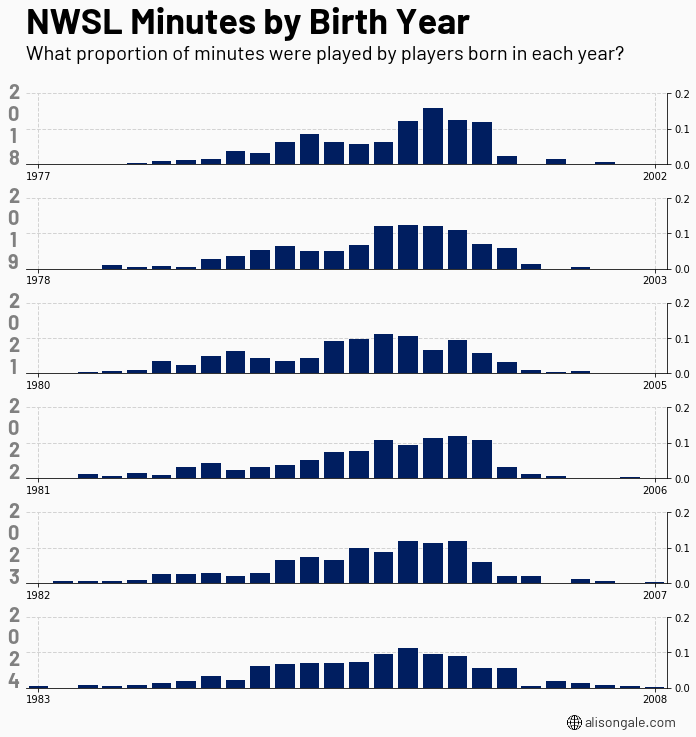

In [34]:
plt.clf()
plt.rcParams["figure.figsize"] = (10, 10)
plt.figure(dpi=400, facecolor=Colors.WHITE)
fig, axs = plt.subplots(plots + 1, 1, height_ratios=[1] + [5] * plots)
fig.patch.set_facecolor(Colors.WHITE)


def plot_metric(ax, year):
    ax.set_facecolor(Colors.WHITE)

    # Group data
    df_group = (
        df[df["year"] == year]
        .groupby("dob_year")
        .agg(minutes=("minutes", "sum"))
        .reset_index()
    )
    df_group["minutes"] = df_group["minutes"] / df_group["minutes"].sum()

    # Plot data
    ax.bar(df_group["dob_year"], df_group["minutes"], color="#001e60")

    # Title
    ax.text(
        -0.02,
        0,
        "\n".join(list(str(year))),
        fontproperties=Fonts.BARLOW_BOLD,
        size=20,
        ha="center",
        transform=ax.transAxes,
        color="gray",
    )

    # Ticks and axes
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.tick_params(right=True, left=False, labelleft=False, labelright=True)
    ax.set_ylim(0, 0.2)
    ax.set_yticks([0, 0.1, 0.2])
    year_offset = year - year_start if offset else 0
    ax.set_xlim(
        min_year - 0.5 + year_offset,
        max_year + 0.5 + year_offset,
    )
    if offset:
        ax.set_xticks([min_year + year_offset, max_year + year_offset])
    if year < year_end and not offset:
        ax.set_xticks([min_year, max_year])
        ax.set_xticks(range(min_year, max_year, 5), minor=True)
        for tick in ax.xaxis.get_minor_ticks():
            tick.tick1line.set_visible(False)
            tick.tick2line.set_visible(False)
    ax.set_axisbelow(True)
    ax.grid(which="both", axis="both", ls="--", color=Colors.LIGHT_GRAY, linewidth=1)


# Plot each metric
for i, year in enumerate(filter(lambda x: x != 2020, range(year_start, year_end + 1))):
    plot_metric(axs[i + 1], year)

# Title
axs[0].axis("off")
axs[0].set_title(
    "NWSL Minutes by Birth Year",
    fontproperties=Fonts.BARLOW_BOLD,
    size=36,
    ha="left",
    x=0,
    y=1.4,
)

# Subtitle
axs[0].text(
    0,
    0,
    "What proportion of minutes were played by players born in each year?",
    fontproperties=Fonts.BARLOW,
    size=20,
    ha="left",
    transform=axs[0].transAxes,
)

# Proper spacing between subplots
fig.tight_layout()

add_signature(fig, x=0.79, y=-0.02, fs=14, w=0.02)

# Save image
plt.savefig(
    "images/nwsl_minutes_by_year_"
    + str(year_end)
    + ("_offset" if offset else "")
    + ".png",
    bbox_inches="tight",
    pad_inches=0.5,
    dpi=200,
)